In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-24.194535887864504, 53.4825328789461),
 (30.177827384694396, -176.8882494628636),
 (-25.893023619678075, -62.167638918161614),
 (32.93590523834882, -157.16897127531183),
 (-48.36284754199631, -44.670629336082555),
 (17.734380826426985, -31.252964226779085),
 (-29.172904709874118, -96.39703326164341),
 (-58.50006375041745, -158.7482793597437),
 (49.21707391657171, 135.21383030446316),
 (-26.176976518369088, -157.01291410713674),
 (14.517930444572485, 78.95893507527899),
 (-22.973953021730836, 88.72828500775603),
 (-27.546326556856243, 165.34457320202677),
 (-80.73869086120914, 166.05089644430154),
 (18.37799636961124, -168.43338946341325),
 (-49.647429783241925, 128.07190303697234),
 (79.19484284563742, 75.03390836864043),
 (-23.022262058980658, -98.1536501603503),
 (44.09869874146233, 98.53058448286407),
 (-60.63505144137417, 28.003484110042535),
 (54.9999571674478, 71.86985742206824),
 (-48.62913194745068, 28.610645545625488),
 (-41.32999313157975, -58.76846327805255),
 (35.5978412

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [5]:
#check the version of request in Jupyter Notebook
import requests
requests.__version__

'2.25.1'

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the API key.
from config import weather_api_key


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | saint-pierre
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | presidencia roque saenz pena
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | litovko
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | cuddapah
Processing Record 11 of Set 1 | bengkulu
Processing Record 12 of Set 1 | vao
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | port lincoln
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | hovd
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | rostovka
Processing Record 20 of Set 1 | necochea
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 23 of Set 1 | hobart
Processing 

Processing Record 42 of Set 4 | pevek
Processing Record 43 of Set 4 | mlimba
Processing Record 44 of Set 4 | victoria
Processing Record 45 of Set 4 | thinadhoo
Processing Record 46 of Set 4 | tabou
Processing Record 47 of Set 4 | samusu
City not found. Skipping...
Processing Record 48 of Set 4 | los llanos de aridane
Processing Record 49 of Set 4 | arraial do cabo
Processing Record 50 of Set 4 | saldanha
Processing Record 1 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 2 of Set 5 | new norfolk
Processing Record 3 of Set 5 | karkaralinsk
City not found. Skipping...
Processing Record 4 of Set 5 | vostok
Processing Record 5 of Set 5 | eftimie murgu
Processing Record 6 of Set 5 | narsaq
Processing Record 7 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 5 | carnarvon
Processing Record 9 of Set 5 | vila velha
Processing Record 10 of Set 5 | lanxi
Processing Record 11 of Set 5 | yumen
Processing Record 12 of Set 5 | zheleznodorozhnyy
Processi

City not found. Skipping...
Processing Record 31 of Set 8 | ust-omchug
Processing Record 32 of Set 8 | kamir
Processing Record 33 of Set 8 | souillac
Processing Record 34 of Set 8 | abhar
Processing Record 35 of Set 8 | alice springs
Processing Record 36 of Set 8 | pitimbu
Processing Record 37 of Set 8 | lorengau
Processing Record 38 of Set 8 | abalak
Processing Record 39 of Set 8 | paracuru
Processing Record 40 of Set 8 | ostrovnoy
Processing Record 41 of Set 8 | bom jesus
Processing Record 42 of Set 8 | barra
Processing Record 43 of Set 8 | sao felix do xingu
Processing Record 44 of Set 8 | meulaboh
Processing Record 45 of Set 8 | beringovskiy
Processing Record 46 of Set 8 | peniche
Processing Record 47 of Set 8 | sokoto
Processing Record 48 of Set 8 | bodmin
Processing Record 49 of Set 8 | ostersund
Processing Record 50 of Set 8 | half moon bay
Processing Record 1 of Set 9 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 9 | cabo san lucas
Processing Record 3 of

Processing Record 20 of Set 12 | jalu
Processing Record 21 of Set 12 | portland
Processing Record 22 of Set 12 | esmeralda
Processing Record 23 of Set 12 | ambulu
Processing Record 24 of Set 12 | gazanjyk
Processing Record 25 of Set 12 | zaraza
Processing Record 26 of Set 12 | kamenskiy
Processing Record 27 of Set 12 | gryfice
Processing Record 28 of Set 12 | bogotol
Processing Record 29 of Set 12 | parnarama
Processing Record 30 of Set 12 | hay river
Processing Record 31 of Set 12 | yeppoon
Processing Record 32 of Set 12 | shibarghan
City not found. Skipping...
Processing Record 33 of Set 12 | uzventis
Processing Record 34 of Set 12 | basco
Processing Record 35 of Set 12 | rojhan
Processing Record 36 of Set 12 | zhuhai
Processing Record 37 of Set 12 | ellsworth
Processing Record 38 of Set 12 | montauban
Processing Record 39 of Set 12 | tottori
Processing Record 40 of Set 12 | atasu
Processing Record 41 of Set 12 | sataua
City not found. Skipping...
Processing Record 42 of Set 12 | mai

In [11]:
len(city_data)

549

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)
#city_data_df.columns

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Pierre,-21.3393,55.4781,77.29,87,75,8.05,RE,2021-11-25 17:16:31
1,Kapaa,22.0752,-159.3190,75.52,81,90,10.36,US,2021-11-25 17:16:31
2,Presidencia Roque Saenz Pena,-26.7852,-60.4388,87.30,65,86,13.58,AR,2021-11-25 17:16:32
3,Mar Del Plata,-38.0023,-57.5575,68.02,86,0,8.99,AR,2021-11-25 17:16:32
4,Ponta Do Sol,32.6667,-17.1000,68.72,62,91,4.99,PT,2021-11-25 17:16:32
5,Lebu,-37.6167,-73.6500,62.19,69,3,10.92,CL,2021-11-25 17:16:33
6,Mataura,-46.1927,168.8643,58.64,54,100,9.44,NZ,2021-11-25 17:16:33
7,Litovko,49.2361,135.1742,16.43,94,100,2.30,RU,2021-11-25 17:16:34
8,Avarua,-21.2078,-159.7750,75.25,94,36,5.75,CK,2021-11-25 17:14:08
9,Cuddapah,14.4667,78.8167,73.35,88,96,3.65,IN,2021-11-25 17:16:34


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Pierre,RE,2021-11-25 17:16:31,-21.3393,55.4781,77.29,87,75,8.05
1,Kapaa,US,2021-11-25 17:16:31,22.0752,-159.3190,75.52,81,90,10.36
2,Presidencia Roque Saenz Pena,AR,2021-11-25 17:16:32,-26.7852,-60.4388,87.30,65,86,13.58
3,Mar Del Plata,AR,2021-11-25 17:16:32,-38.0023,-57.5575,68.02,86,0,8.99
4,Ponta Do Sol,PT,2021-11-25 17:16:32,32.6667,-17.1000,68.72,62,91,4.99
...,...,...,...,...,...,...,...,...,...
544,Ellsworth,US,2021-11-25 17:31:15,44.5434,-68.4195,50.68,47,1,8.99
545,Montauban,FR,2021-11-25 17:31:16,44.0833,1.5000,52.12,92,99,4.38
546,Tottori,JP,2021-11-25 17:31:16,35.5000,134.2333,51.62,68,67,10.92
547,Atasu,KZ,2021-11-25 17:31:16,48.6814,71.6433,7.92,92,59,8.30


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

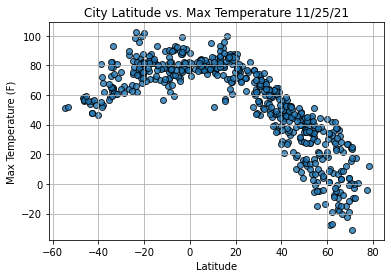

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

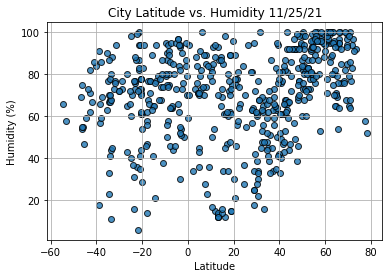

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

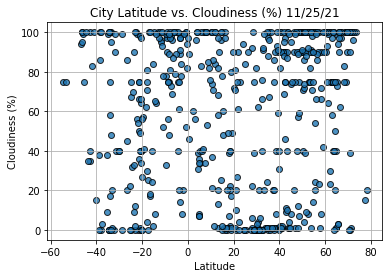

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

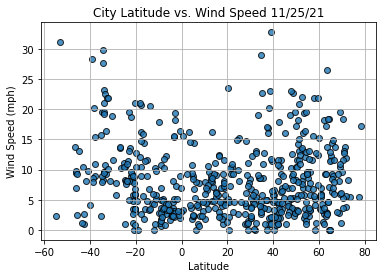

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [51]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [52]:
index13 = city_data_df.loc[13]
index13

City                 Port Lincoln
Country                        AU
Date          2021-11-25 17:16:36
Lat                      -34.7333
Lng                      135.8667
Max Temp                    58.68
Humidity                       77
Cloudiness                     99
Wind Speed                  19.53
Name: 13, dtype: object

In [53]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
544     True
545     True
546     True
547     True
548     True
Name: Lat, Length: 549, dtype: bool

In [54]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kapaa,US,2021-11-25 17:16:31,22.0752,-159.3190,75.52,81,90,10.36
4,Ponta Do Sol,PT,2021-11-25 17:16:32,32.6667,-17.1000,68.72,62,91,4.99
7,Litovko,RU,2021-11-25 17:16:34,49.2361,135.1742,16.43,94,100,2.30
9,Cuddapah,IN,2021-11-25 17:16:34,14.4667,78.8167,73.35,88,96,3.65
14,Dikson,RU,2021-11-25 17:16:36,73.5069,80.5464,0.55,92,100,5.48


In [55]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

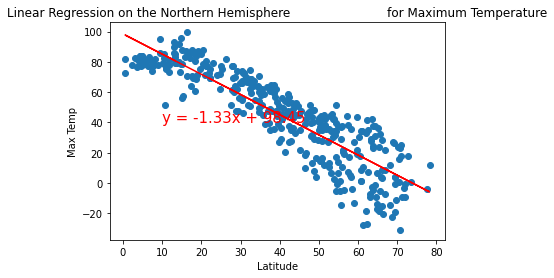

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

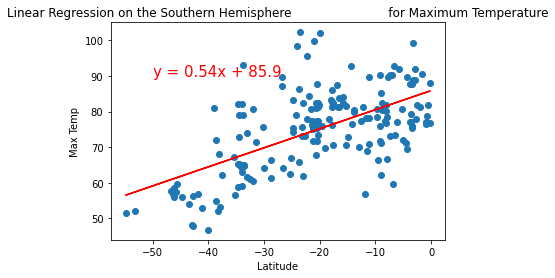

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

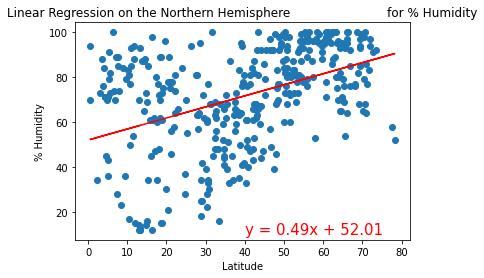

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

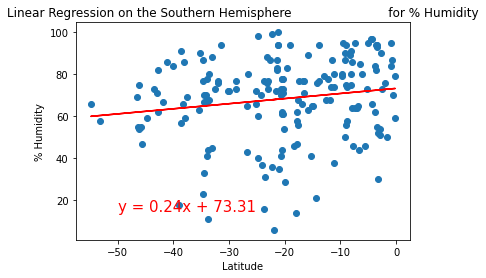

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

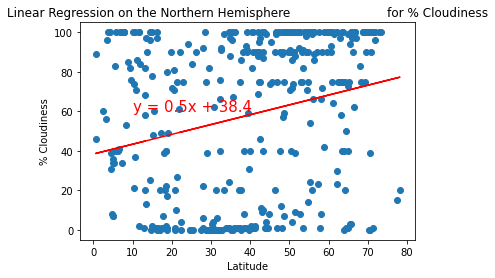

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

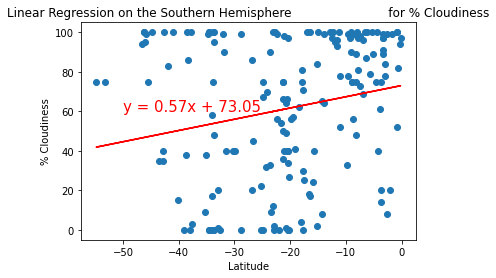

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


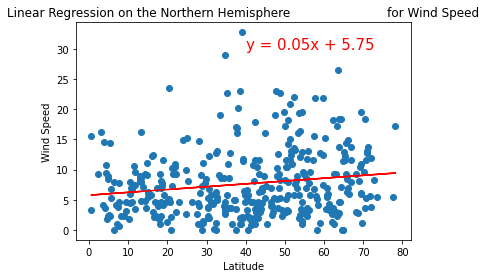

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

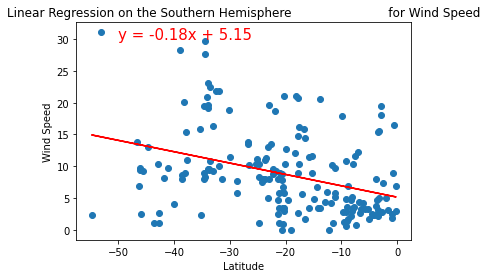

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))
